In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Exercício de Aula - 5a

Resolver:

$$
\begin{cases} 
    \frac{du_1}{dt} = 1.2u_1 - 0.6 u_1 u_2 \\
    \frac{du_2}{dt} = 0.8u_2 + 0.3 u_1 u_2
\end{cases}, u_1(0) = 2, u_2(0) = 1, T_f = 20 
$$

Com o método RK4 (Runge-Kutta 4)

In [2]:
def evaluate_runge_kutta(f, u0, h = 0.001, start = 0, finish = 20, tol = 1e-3):
    t = [start]
    u = [u0]
    i = 1
    while t[-1] < finish:
        tn = t[-1]
        un = u[-1]
        k1 = f(tn, un)
        k2 = f(tn + h/2, un + (h/2)*k1)
        k3 = f(tn + h/2, un + (h/2)*k2)
        k4 = f(tn + h, un + h*k3)
        t.append(t[-1] + h)
        u.append(un + (h/6)*(k1 + 2*k2 + 2*k3 + k4))
        i = i + 1
    return np.vstack((np.transpose(t), np.transpose(u)))

#
# Here just as a test proof if the previous method is working:
#
def evaluate_euler(f, u0, h = 0.001, start = 0, finish = 20, tol = 1e-3):
    t = [start]
    u = [u0]
    i = 1
    while t[-1] < finish:
        tn = t[-1]
        un = u[-1]
        t.append(t[-1] + h)
        u.append(un + h * f(tn, un))
        i = i + 1
        
    return np.vstack((np.transpose(t), np.transpose(u)))

In [3]:
def f(t, u):
    u_1 = u[0]
    u_2 = u[1]
    return np.array([1.2 * u_1 - 0.6 * u_1 * u_2, 0.8 * u_2 + 0.3 * u_1 * u_2])

res = evaluate_runge_kutta(f, np.array([2, 1]))

t_n = res[0]
u1_n = res[1]
u2_n = res[2]

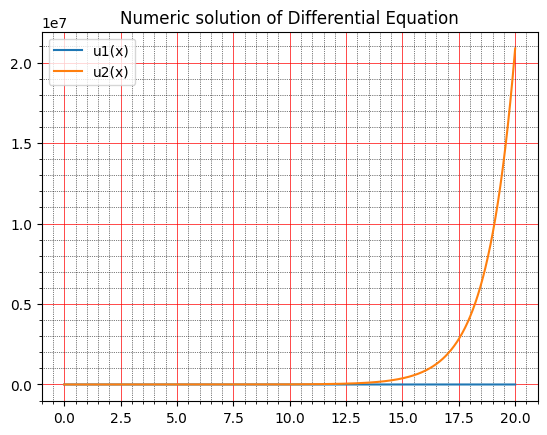

In [4]:
fig, ax = plt.subplots()

plt.plot(t_n, u1_n, label="u1(x)")
plt.plot(t_n, u2_n, label="u2(x)")
ax.set_axisbelow(True)
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth='0.5', color='red')
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title("Numeric solution of Differential Equation")
plt.legend()

ax = plt.gca()

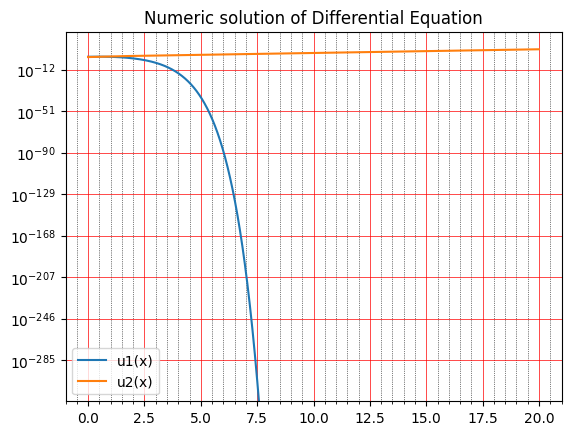

In [5]:
fig, ax = plt.subplots()

plt.semilogy(t_n, u1_n, label="u1(x)")
plt.semilogy(t_n, u2_n, label="u2(x)")
ax.set_axisbelow(True)
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth='0.5', color='red')
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title("Numeric solution of Differential Equation")
plt.legend()

ax = plt.gca()

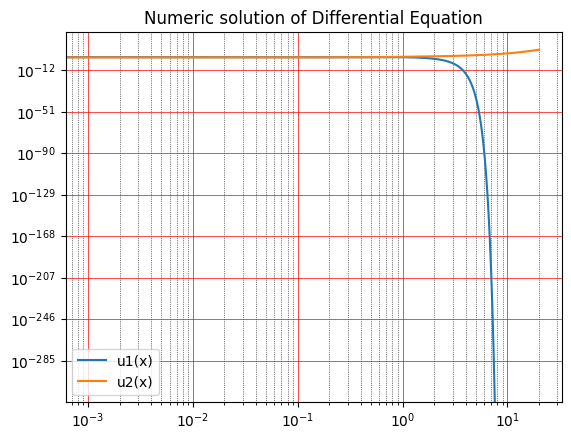

In [6]:
fig, ax = plt.subplots()

plt.loglog(t_n, u1_n, label="u1(x)")
plt.loglog(t_n, u2_n, label="u2(x)")
ax.set_axisbelow(True)
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth='0.5', color='red')
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title("Numeric solution of Differential Equation")
plt.legend()

ax = plt.gca()

Como o intervalo [0,20] não permite ver com clareza a topologia dos resultados, segue um gráfico em um intervalo mais curto:

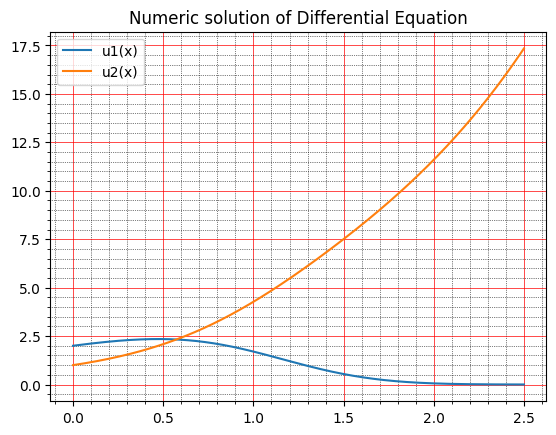

In [9]:
fig, ax = plt.subplots()

plt.plot(t_n[:2500], u1_n[:2500], label="u1(x)")
plt.plot(t_n[:2500], u2_n[:2500], label="u2(x)")
ax.set_axisbelow(True)
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth='0.5', color='red')
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title("Numeric solution of Differential Equation")
plt.legend()

ax = plt.gca()